# ID3

# Descripción

Prompt ChatGPT: *describe el algoritmo de ML Locally Weighted Learning*

El algoritmo ID3 (Iterative Dichotomiser 3) es un algoritmo de aprendizaje automático utilizado para la construcción de árboles de decisión. Fue desarrollado por Ross Quinlan en la década de 1980 y se utiliza principalmente en problemas de clasificación. El algoritmo ID3 se basa en la idea de dividir recursivamente el conjunto de datos en subconjuntos más pequeños y más homogéneos utilizando atributos específicos.

El algoritmo ID3 tiene algunas limitaciones, como su tendencia al sobreajuste y su incapacidad para manejar atributos numéricos directamente (a menos que se realice discretización previa). A lo largo de los años, han surgido variantes más avanzadas de los algoritmos de árbol de decisión, como C4.5 y CART, que abordan algunas de estas limitaciones y se utilizan con mayor frecuencia en la práctica.

# Bibtex y Referencias

Paper: https://link.springer.com/chapter/10.1007/978-94-017-2053-3_2

JR Quinlan  (1986). Induction of decision trees

@article{quinlan1986induction,
  title={Induction of decision trees},
  author={Quinlan, J. Ross},
  journal={Machine learning},
  volume={1},
  pages={81--106},
  year={1986},
  publisher={Springer}
}

##Tipo de modelo

**Segun el Tipo de aprendizaje:**

 *Supervisado*

**Segun la Asuncion y parametros en entrenamiento:**

*Parametrico*

**Segun el Tipo de datos al entranar:**

*Offline (batches)*

**Resultado de entrenamiento:**

*Basado en Modelo*

# Algoritmos de entrenamiento

Prompt ChatGPT: *describe el algoritmo de Support Vector Machine*

 A continuación, se describen los pasos clave del algoritmo ID3:

1. **Selección del atributo**: El algoritmo ID3 comienza con un conjunto de datos de entrenamiento y una lista de atributos que se pueden utilizar para la clasificación. El objetivo es seleccionar el atributo que mejor divide el conjunto de datos en clases más homogéneas.

2. **Criterio de selección de atributo**: Para determinar cuál es el mejor atributo para dividir el conjunto de datos, ID3 utiliza un criterio llamado "ganancia de información" (information gain). La ganancia de información se calcula comparando la impureza (entropía) antes y después de dividir el conjunto de datos en función de un atributo específico. El atributo con la mayor ganancia de información se selecciona como el atributo de división.

3. **Creación del nodo del árbol**: Se crea un nodo en el árbol de decisión y se etiqueta con el atributo seleccionado.

4. **División del conjunto de datos**: El conjunto de datos se divide en subconjuntos basados en los valores del atributo seleccionado. Cada subconjunto corresponde a una rama del árbol de decisión.

5. **Recursión**: El algoritmo ID3 se aplica recursivamente a cada uno de los subconjuntos creados en el paso anterior. Este proceso continúa hasta que se cumplen ciertos criterios de parada, como que todos los ejemplos en un nodo son de la misma clase o que no quedan atributos para dividir.

6. **Etiquetado de las hojas del árbol**: Cuando se alcanzan las hojas del árbol (nodos terminales), se etiquetan con la clase más común en ese subconjunto de datos.

7. **Árbol de decisión completo**: Una vez que el algoritmo ID3 ha terminado, se obtiene un árbol de decisión completo que se puede utilizar para realizar clasificaciones en nuevos ejemplos.

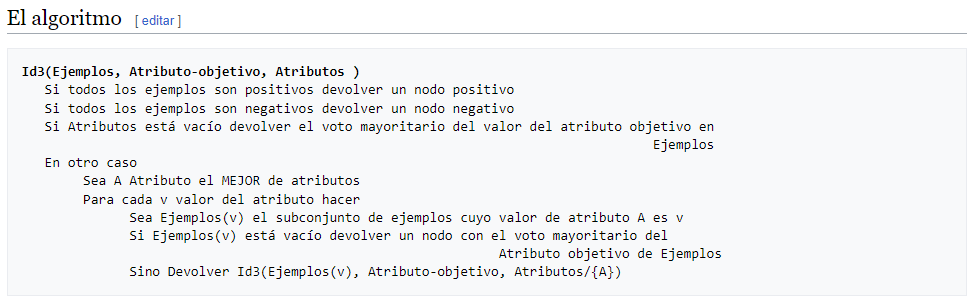

## Supuestos y Restricciones

Prompt ChatGPT: *dame los supuestos y restricciones para  el algoritmo de  SVM*

Aquí están los supuestos y restricciones principales del algoritmo ID3:

**Supuestos:**

1. **Atributos discretos**: ID3 está diseñado principalmente para trabajar con atributos categóricos o discretos. No maneja directamente atributos numéricos. Si se desean utilizar atributos numéricos, es necesario realizar previamente una discretización.

2. **Valores faltantes**: El algoritmo asume que no hay valores faltantes en el conjunto de datos de entrenamiento. Los valores faltantes deben ser tratados previamente mediante técnicas de imputación o eliminación de instancias.

3. **Atributos de igual importancia**: ID3 asume que todos los atributos son igualmente importantes para la clasificación. Esto puede no ser cierto en la práctica, y otros algoritmos como C4.5 permiten la ponderación de atributos.

4. **Suficiente cantidad de datos**: Para que ID3 funcione correctamente, se necesita una cantidad suficiente de datos de entrenamiento que cubra todas las combinaciones posibles de valores de atributos.

**Restricciones:**

1. **Sobreajuste (Overfitting)**: ID3 tiende a crear árboles de decisión complejos que se ajustan perfectamente a los datos de entrenamiento, lo que puede llevar al sobreajuste. Este es un problema especialmente en conjuntos de datos pequeños o ruidosos. La complejidad del árbol se puede reducir mediante la poda del árbol o mediante el uso de algoritmos más avanzados como C4.5 o CART.

2. **Falta de manejo de atributos numéricos**: ID3 no maneja atributos numéricos de manera directa, lo que puede limitar su utilidad en conjuntos de datos que incluyen atributos continuos. Los atributos numéricos deben ser discretizados previamente.

3. **Alto costo computacional**: La construcción de un árbol de decisión mediante ID3 puede ser computacionalmente costosa, especialmente en conjuntos de datos grandes, debido a la recursión y la búsqueda exhaustiva de atributos. Esto puede ser un desafío en términos de tiempo y recursos computacionales.

4. **Falta de manejo de valores faltantes**: ID3 no maneja de manera inherente los valores faltantes en los datos. Antes de aplicar ID3, es necesario abordar los valores faltantes mediante técnicas de imputación o eliminación.

En resumen, ID3 es un algoritmo eficaz para la construcción de árboles de decisión en ciertas condiciones y bajo ciertos supuestos. Sin embargo, se deben tener en cuenta sus limitaciones, como su tendencia al sobreajuste, su incapacidad para manejar atributos numéricos directamente y su falta de manejo de valores faltantes, cuando se elige utilizar este algoritmo en un problema específico.

## Ejemplo en python



In [1]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)
def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)
def buildTree(df,tree=None):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name  #Here we build our decision tree  #Get attribute with maximum information gain
    node = find_winner(df)#Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])#Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}#We make loop to construct a tree by calling this function recursively. #In this we check if the subset is pure and stops if it is pure.
    for value in attValue:
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['play'],return_counts=True)
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively
    return tree


In [2]:
import pandas as pd
import numpy as np
eps = np.finfo(float).eps
from numpy import log2 as log
df = pd.read_csv('/content/tennis.csv')
print("\n Given Play Tennis Data Set:\n\n",df)
tree= buildTree(df)
import pprint
pprint.pprint(tree)

test={'Outlook':'Sunny','Temperature':'Hot','Humidity':'High','Wind':'Weak'}

def func(test, tree, default=None):
    attribute = next(iter(tree))
    print(attribute)
    if test[attribute] in tree[attribute].keys():
        print(tree[attribute].keys())
        print(test[attribute])
        result = tree[attribute][test[attribute]]
        if isinstance(result, dict):
            return func(test, result)
        else:
            return result
    else:
        return default
ans = func(test, tree)
print(ans)



 Given Play Tennis Data Set:

      Outlook Temperature Humidity    Wind play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
Outlook
dict_keys(['Overcast', 'Rain', 'Sunny'])
Sunny
Humidity
dict_keys(['High', 'Normal'])
Hig